### The German Housing Market: 14 Years of Data and Where Prices are Heading.
#### Data Science Group 7


#### Short description
We proudly announce our topic for this semester:
Price Indices for Owner-Occupied Housing in Germany (2010–2024)
Group Number: Data Science Group 7
Our project idea in one sentence:
We aim to analyze and forecast the development of owner-occupied housing price indices in Germany from 2010 to 2024 using time series models and economic indicators.
Our motivation behind it:
Given the sharp rise in housing prices and the fact that buying a home is increasingly only possible through loans, we were motivated to explore how housing costs have changed over time in Germany. As young adults, this is also a personal concern, as affording property has become a growing challenge for our generation.
What the final result of our project might look like:
The project may include an interactive dashboard and a report that visualizes the development of housing price indices in Germany from 2010 to 2024, highlights key trends (e.g. rising construction or acquisition costs) and presents a time series forecast for the coming years. Depending on data availability and model performance, we may adjust the focus during the project.

In [63]:
%reset -f

In [64]:
import numpy as np
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

import warnings
from statsmodels.tools.sm_exceptions import ValueWarning, ConvergenceWarning

warnings.filterwarnings("ignore", category=ValueWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

color_ds = "#FF0050" 
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = "--"
plt.rcParams["grid.alpha"] = 0.6
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=[color_ds])

Daten einlesen von 
 https://www-genesis.destatis.de/datenbank/online/statistic/61262/table/61262-0003/chart/line#chartFilter=JTdCJTIyZGlhZ3JhbVR5cGUlMjIlM0ElMjJsaW5lJTIyJTJDJTIyY29udGVudCUyMiUzQSUyMlBSRTA0MCUyNFFNVSUyMiUyQyUyMnhBeGlzVmFyaWFibGVzJTIyJTNBJTVCJTIySkFIUiUyMiU1RCUyQyUyMnhBeGlzVmFyaWFibGVWYWx1ZXMlMjIlM0ElNUIlMjIyMDEwJTIyJTJDJTIyMjAxMSUyMiUyQyUyMjIwMTIlMjIlMkMlMjIyMDEzJTIyJTJDJTIyMjAxNCUyMiUyQyUyMjIwMTUlMjIlMkMlMjIyMDE2JTIyJTJDJTIyMjAxNyUyMiUyQyUyMjIwMTglMjIlMkMlMjIyMDE5JTIyJTJDJTIyMjAyMCUyMiUyQyUyMjIwMjElMjIlMkMlMjIyMDIyJTIyJTJDJTIyMjAyMyUyMiUyQyUyMjIwMjQlMjIlNUQlMkMlMjJ0YWJsZUNvZGUlMjIlM0ElMjI2MTI2Mi0wMDAzJTIyJTJDJTIyY3VydmVzR3JvdXBzJTIyJTNBJTVCJTdCJTIyY3ViZSUyMiUzQSUyMkRTXzAwMiUyMiUyQyUyMmN1cnZlcyUyMiUzQSU1QiU3QiUyMmNvbG9yJTIyJTNBJTIyJTIzMDA2Mjk4JTIyJTJDJTIydmlzaWJsZSUyMiUzQXRydWUlMkMlMjJkYXRhU3BlY2lmaWNhdGlvbiUyMiUzQSU3QiUyMnNlbGVjdGVkVmFyaWFibGVzVmFsdWVzJTIyJTNBJTdCJTdEJTJDJTIyY3VycmVudE1haW5WYXJpYWJsZSUyMiUzQSUyMkpBSFIlMjIlMkMlMjJjdXJyZW50TWFpblZhcmlhYmxlVmFsdWVzJTIyJTNBJTVCJTIyMjAxMCUyMiUyQyUyMjIwMTElMjIlMkMlMjIyMDEyJTIyJTJDJTIyMjAxMyUyMiUyQyUyMjIwMTQlMjIlMkMlMjIyMDE1JTIyJTJDJTIyMjAxNiUyMiUyQyUyMjIwMTclMjIlMkMlMjIyMDE4JTIyJTJDJTIyMjAxOSUyMiUyQyUyMjIwMjAlMjIlMkMlMjIyMDIxJTIyJTJDJTIyMjAyMiUyMiUyQyUyMjIwMjMlMjIlMkMlMjIyMDI0JTIyJTVEJTJDJTIyY3VycmVudFN1YlZhcmlhYmxlJTIyJTNBbnVsbCUyQyUyMmN1cnJlbnRTdWJWYXJpYWJsZVZhbHVlcyUyMiUzQSU1QiU1RCU3RCU3RCU1RCUyQyUyMmZpeGVkVmFyaWFibGVzVmFsdWVzJTIyJTNBJTdCJTIyc3RhdGlzdGljJTIyJTNBJTIyNjEyNjIlMjIlMkMlMjJESU5TRyUyMiUzQSUyMkRHJTIyJTdEJTdEJTVEJTdE

In [65]:
DATA_PATH = Path("data") / "61262-0003_de_flat.csv"
assert DATA_PATH.exists(), f"Datei nicht gefunden: {DATA_PATH.resolve()}"

df_raw = pd.read_csv(
    DATA_PATH, sep=";", decimal=",", encoding="cp1252", na_values=["-", "", " "]
)

print("Form:", df_raw.shape)
print("Spalten:", list(df_raw.columns)[:8], "...")
print(df_raw.head(3))


Form: (150, 14)
Spalten: ['ï»¿statistics_code', 'statistics_label', 'time_code', 'time_label', 'time', '1_variable_code', '1_variable_label', '1_variable_attribute_code'] ...
   ï»¿statistics_code                  statistics_label time_code time_label  \
0               61262  Preisindizes fÃ¼r Wohnimmobilien      JAHR       Jahr   
1               61262  Preisindizes fÃ¼r Wohnimmobilien      JAHR       Jahr   
2               61262  Preisindizes fÃ¼r Wohnimmobilien      JAHR       Jahr   

   time 1_variable_code       1_variable_label 1_variable_attribute_code  \
0  2016           DINSG  Deutschland insgesamt                        DG   
1  2016           DINSG  Deutschland insgesamt                        DG   
2  2016           DINSG  Deutschland insgesamt                        DG   

  1_variable_attribute_label  value value_unit value_variable_code  \
0                Deutschland  102.7   2015=100              PRE048   
1                Deutschland    NaN   2015=100             

In [67]:
df = df_raw[["time", "1_variable_label", "value"]].rename(
    columns={"time": "year", "1_variable_label": "category", "value": "index_value"}
).copy()

# Jahr -> Zahl
df["year"] = pd.to_numeric(df["year"], errors="coerce")

# Indexwert -> Zahl (Komma zu Punkt)
df["index_value"] = (
    df["index_value"].astype(str).str.replace(",", ".", regex=False).replace("-", None)
)
df["index_value"] = pd.to_numeric(df["index_value"], errors="coerce")

# Kategorie als Text
df["category"] = df["category"].astype(str)

df_clean = df.dropna(subset=["year", "index_value"])
df_clean = df_clean[(df_clean["year"] >= 1900) & (df_clean["year"] <= 2100)]

print("Form nach Bereinigung:", df_clean.shape)
print(df_clean.head())

Form nach Bereinigung: (143, 3)
   year               category  index_value
0  2016  Deutschland insgesamt        102.7
2  2016  Deutschland insgesamt        102.8
3  2016  Deutschland insgesamt        102.9
4  2016  Deutschland insgesamt        102.4
5  2016  Deutschland insgesamt        102.7


Erklärung: In Zelle 3 reduziere ich den Roh-Datensatz auf genau die Spalten, die ich für die Analyse brauche: Jahr (year), Kategorie (category) und den Indexwert (index_value). Dabei benenne ich die Spalten aus der CSV entsprechend um. Danach wandle ich das Jahr von Text in eine Zahl um, damit ich damit rechnen und sortieren kann. Die Indexwerte konvertiere ich ebenfalls in echte Zahlen: Falls in der Datei Kommas als Dezimalzeichen stehen, ersetze ich sie durch Punkte und mache daraus Gleitkommazahlen. Zeilen ohne Jahr oder ohne Indexwert werden entfernt, ebenso offensichtliche Ausreißerjahre (z. B. außerhalb 1900–2100). Das Ergebnis ist ein aufgeräumter DataFrame df_clean mit drei Spalten, der sich direkt für Auswertungen und Modelle eignet.

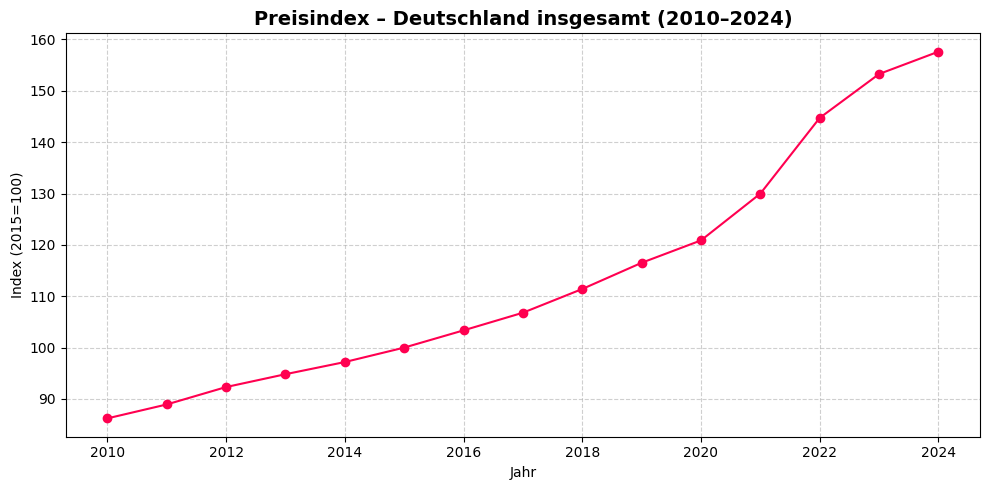

Letzte Jahre:
2020: 120.87
2021: 129.98
2022: 144.72
2023: 153.26
2024: 157.61


In [69]:
def make_series(df_clean, category):
    return (
        df_clean[df_clean["category"] == category]
        .groupby("year")["index_value"].mean()
        .sort_index()
        .astype(float)
    )

def plot_series(y, title):
    plt.figure()
    plt.plot(y.index.astype(int), y.values, marker="o", linestyle="-")
    plt.title(title, fontsize=14, fontweight="bold")
    plt.xlabel("Jahr"); plt.ylabel("Index (2015=100)")
    plt.tight_layout()
    plt.show()

cat = "Deutschland insgesamt"
y = make_series(df_clean, cat)
plot_series(y, f"Preisindex – {cat} ({int(y.index.min())}–{int(y.index.max())})")

print("Letzte Jahre:")
for year, val in y.tail(5).items():
    print(f"{int(year)}: {val:.2f}")

Erklärung: Die Tabelle zeigt die letzten fünf Jahreswerte des Preisindex für selbstgenutztes Wohneigentum in Deutschland insgesamt. Der Index ist auf das Basisjahr 2015 normiert (= 100). Ein Wert über 100 bedeutet, dass die Preise im jeweiligen Jahr über dem Niveau von 2015 liegen. So lag der Index im Jahr 2020 bei 120,87, was einer Preissteigerung von rund 21 % im Vergleich zu 2015 entspricht. Bis 2022 stieg der Index bereits auf 144,72 und damit auf fast 45 % über dem Basiswert. Im Jahr 2024 erreicht der Index schließlich 157,61, also etwa 58 % über dem Niveau von 2015. Diese Entwicklung verdeutlicht den deutlichen Aufwärtstrend der Wohnkosten im betrachteten Zeitraum.

Bevor ein ARIMA-Modell angewendet werden kann, muss geprüft werden, ob die Zeitreihe stationär ist. Eine stationäre Reihe bedeutet, dass ihre statistischen Eigenschaften (Mittelwert, Varianz) sich im Zeitverlauf nicht verändern. Da Preisreihen in der Regel einen Trend enthalten, sind sie oft nicht stationär.

Um dies zu überprüfen, verwenden wir den Augmented Dickey-Fuller-Test (ADF-Test). Der Test gibt einen p-Wert zurück:

Ist der p-Wert kleiner als 0,05, lehnen wir die Nullhypothese („Die Reihe ist nicht stationär“) ab → die Reihe ist stationär.

Liegt der p-Wert über 0,05, gilt die Reihe als nicht stationär. In diesem Fall führen wir eine Differenzierung durch, d. h. wir betrachten die Veränderung von einem Jahr zum nächsten, statt die absoluten Werte.
Nach der Differenzierung prüfen wir erneut mit dem ADF-Test. Erst wenn die Reihe stationär ist, können wir ein ARIMA-Modell anwenden.

In [70]:
adf_result = adfuller(y)
print("ADF-Test auf Originalreihe:")
print("  ADF-Statistik:", adf_result[0])
print("  p-Wert:", adf_result[1])
print("  Kritische Werte:", adf_result[4])

# Falls nicht stationär (p-Wert > 0.05), 1. Differenz bilden
if adf_result[1] > 0.05:
    y_diff = y.diff().dropna()
    adf_result_diff = adfuller(y_diff)
    print("\nNach 1. Differenzierung:")
    print("  ADF-Statistik:", adf_result_diff[0])
    print("  p-Wert:", adf_result_diff[1])
    print("  Kritische Werte:", adf_result_diff[4])
else:
    y_diff = None


ADF-Test auf Originalreihe:
  ADF-Statistik: 1.8718301398870874
  p-Wert: 0.9984813265849409
  Kritische Werte: {'1%': np.float64(-4.223238279489106), '5%': np.float64(-3.189368925619835), '10%': np.float64(-2.729839421487603)}

Nach 1. Differenzierung:
  ADF-Statistik: 2.567715810300617
  p-Wert: 0.9990684825379217
  Kritische Werte: {'1%': np.float64(-4.223238279489106), '5%': np.float64(-3.189368925619835), '10%': np.float64(-2.729839421487603)}


Erklärung: Um mit einem Prognosemodell arbeiten zu können, muss die Zeitreihe bestimmte statistische Eigenschaften erfüllen. Eine wichtige Voraussetzung ist die sogenannte Stationarität. Das bedeutet, dass sich der Mittelwert und die Streuung der Werte im Zeitverlauf nicht systematisch verändern. Bei einem Index, der über viele Jahre hinweg immer weiter ansteigt, wie unserem Preisindex für Wohneigentum, ist diese Bedingung normalerweise nicht erfüllt.

Mit dem Augmented Dickey-Fuller-Test (ADF-Test) können wir prüfen, ob eine Zeitreihe stationär ist. Der Test liefert einen sogenannten p-Wert. Liegt dieser unter 0,05, können wir annehmen, dass die Reihe stationär ist. Liegt er deutlich darüber, ist die Reihe nicht stationär.

Für unsere Originalreihe lag der p-Wert bei 0,998, also fast bei 1. Damit bestätigt der Test, dass die Reihe nicht stationär ist. Um dieses Problem zu beheben, wenden wir eine Differenzierung an: Dabei wird nicht mehr der eigentliche Index betrachtet, sondern die Veränderung von einem Jahr zum nächsten. Auch diese differenzierte Reihe haben wir mit dem ADF-Test überprüft. Doch auch hier war der p-Wert fast 1. Das bedeutet: Selbst nach der ersten Differenzierung ist die Reihe noch immer nicht stationär.

Die Schlussfolgerung ist, dass unser Preisindex einen besonders starken Trend enthält. Damit er sich für Prognosemodelle wie ARIMA eignet, müssen wir entweder eine zweite Differenzierung durchführen oder die Werte vorab transformieren (zum Beispiel mit einem Logarithmus).

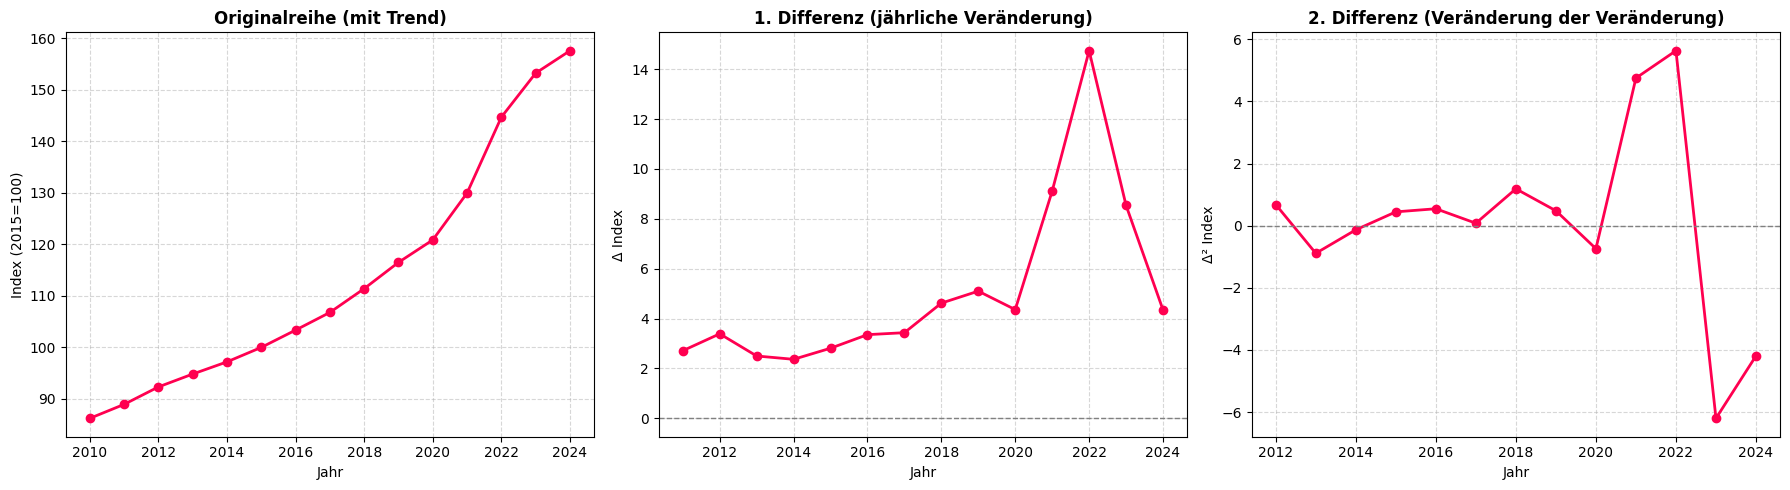

In [71]:
# 1. Differenz
y_diff1 = y.diff().dropna()

# 2. Differenz
y_diff2 = y_diff1.diff().dropna()

# Achsen vorbereiten
x0 = y.index.astype(int)
x1 = y_diff1.index.astype(int)
x2 = y_diff2.index.astype(int)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Originalreihe
axes[0].plot(x0, y.values, marker="o", linewidth=2)
axes[0].set_title("Originalreihe (mit Trend)", fontsize=12, fontweight="bold")
axes[0].set_xlabel("Jahr"); axes[0].set_ylabel("Index (2015=100)")
axes[0].grid(True, linestyle="--", alpha=0.5)

# 1. Differenz
axes[1].plot(x1, y_diff1.values, marker="o", linewidth=2)
axes[1].axhline(0, ls="--", lw=1, color="grey")
axes[1].set_title("1. Differenz (jährliche Veränderung)", fontsize=12, fontweight="bold")
axes[1].set_xlabel("Jahr"); axes[1].set_ylabel("Δ Index")
axes[1].grid(True, linestyle="--", alpha=0.5)

# 2. Differenz
axes[2].plot(x2, y_diff2.values, marker="o", linewidth=2)
axes[2].axhline(0, ls="--", lw=1, color="grey")
axes[2].set_title("2. Differenz (Veränderung der Veränderung)", fontsize=12, fontweight="bold")
axes[2].set_xlabel("Jahr"); axes[2].set_ylabel("Δ² Index")
axes[2].grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


Da der ADF-Test gezeigt hat, dass weder die Originalreihe noch die einmal differenzierte Reihe stationär ist, erweitern wir unsere Analyse und betrachten auch die zweifach differenzierte Reihe.

Originalreihe: zeigt den kontinuierlichen Aufwärtstrend der Immobilienpreise.

Erste Differenzierung: stellt die jährlichen Veränderungen dar. Hier erkennt man Schwankungen, aber noch immer ein gewisses Muster, das auf Nicht-Stationarität hindeutet.

Zweite Differenzierung: zeigt die Veränderung der Veränderung, also wie stark die jährlichen Steigerungen selbst von Jahr zu Jahr schwanken. Diese Reihe sieht wesentlich stabiler aus und ist ein guter Kandidat für ein stationäres Modell.

Durch diese Visualisierung wird deutlich, warum wir für unser ARIMA-Modell eine höhere Ordnung der Differenzierung (d=2) in Betracht ziehen müssen.

In [72]:
# Modell definieren (p=1, d=2, q=1)
model = ARIMA(y, order=(1, 2, 1))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:            index_value   No. Observations:                   15
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 -31.054
Date:                Fri, 29 Aug 2025   AIC                             68.107
Time:                        22:42:56   BIC                             69.802
Sample:                             0   HQIC                            67.759
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3679      0.935     -0.394      0.694      -2.200       1.464
ma.L1          0.9331      2.207      0.423      0.672      -3.393       5.259
sigma2         6.3331      9.022      0.702      0.4

Nachdem wir gesehen haben, dass die Originalreihe und auch die einmal differenzierte Reihe nicht stationär sind, nutzen wir für unser Prognosemodell eine zweifach differenzierte Reihe. Das bedeutet, dass im ARIMA-Modell der Parameter d=2 gesetzt wird.

ARIMA steht für „AutoRegressive Integrated Moving Average“. Das Modell besteht aus drei Parametern (p, d, q):

p: Anzahl autoregressiver Terme (wie viele frühere Werte berücksichtigt werden).

d: Anzahl der Differenzierungen (hier 2, weil wir zweimal differenzieren mussten).

q: Anzahl gleitender Durchschnitte, die das Modell verwendet.

In unserem Beispiel beginnen wir mit einem einfachen Modell ARIMA(1,2,1). Die erste Zahl (p=1) berücksichtigt den letzten Wert der Reihe, die zweite Zahl (d=2) gibt die notwendige Differenzierung an, und die dritte Zahl (q=1) fügt einen Term des gleitenden Durchschnitts hinzu.

Das Modell wird auf unsere Zeitreihe angepasst („fitten“), sodass es die Struktur der Daten möglichst gut beschreibt und wir im nächsten Schritt Prognosen erstellen können.

c:\Users\emyho\miniconda3\envs\Datenanalyse1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


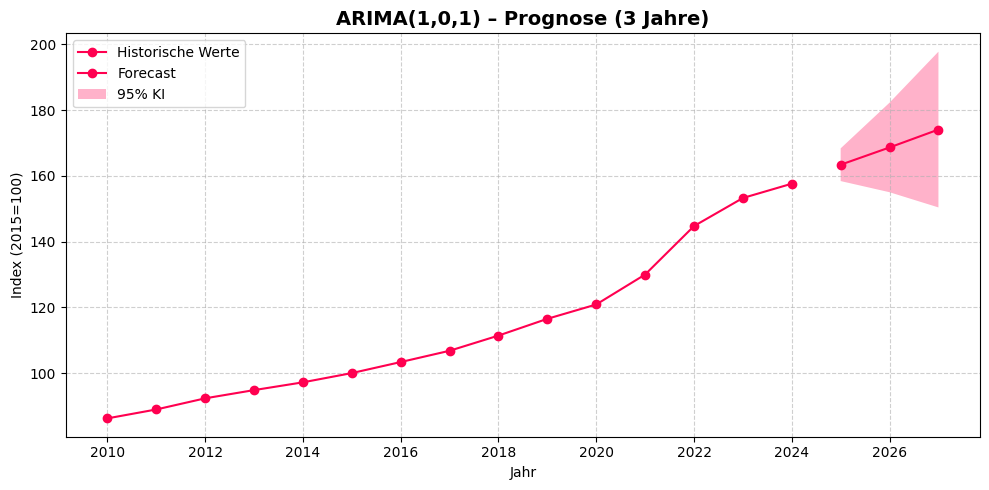

In [73]:
h = 3
fc_res = model_fit.get_forecast(steps=h)

fc_mean = fc_res.predicted_mean
fc_ci   = fc_res.conf_int()

# Forecast-Jahre definieren (2025–2027)
last_year = int(y.index.max())
fc_index = pd.Index(range(last_year + 1, last_year + h + 1), name="year")
fc_mean.index = fc_index
fc_ci.index   = fc_index

plt.figure(figsize=(10, 5))

plt.plot(y.index, y.values, marker="o", label="Historische Werte")
plt.plot(fc_mean.index, fc_mean.values, marker="o", label="Forecast")
plt.fill_between(fc_ci.index,
                 fc_ci.iloc[:, 0].values,
                 fc_ci.iloc[:, 1].values,
                 alpha=0.3, label="95% KI")

plt.title("ARIMA(1,0,1) – Prognose (3 Jahre)", fontsize=14, fontweight="bold")
plt.xlabel("Jahr"); plt.ylabel("Index (2015=100)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

Nachdem das ARIMA-Modell angepasst wurde, nutzen wir es, um Vorhersagen für die kommenden Jahre zu erzeugen.
Wir geben eine Schrittlänge h vor (z. B. 3 Jahre) und lassen uns neben den Punktschätzungen auch Konfidenzintervalle ausgeben.

Die Punktschätzung ist der „beste Schätzwert“ des Modells.

Das Konfidenzintervall (meist 95 %) zeigt einen realistischen Bereich, in dem der wahre Wert mit hoher Wahrscheinlichkeit liegen wird.
Für die Darstellung kombinieren wir die historischen Werte mit der Prognose und schattieren das Intervall. 

Interpretation: Die Ergebnisse des ARIMA-Modells zeigen, dass der Preisindex für selbstgenutztes Wohneigentum in Deutschland auch in den kommenden Jahren weiter steigen dürfte. Für das Jahr 2025 schätzt das Modell einen Indexwert von rund 163 Punkten, für 2026 etwa 169 Punkte und für 2027 rund 174 Punkte. Im Vergleich zum Basisjahr 2015 (Index = 100) entspricht das einer Preissteigerung von mehr als 70 %.

Auffällig ist, dass das Konfidenzintervall mit jedem Prognosejahr breiter wird. Das bedeutet: Je weiter die Vorhersage in die Zukunft reicht, desto größer ist die Unsicherheit. Während die Schätzung für 2025 noch relativ eng begrenzt ist, reicht das Intervall für 2027 bereits von etwa 150 bis knapp 198 Punkten.

Die Prognose macht deutlich, dass sich die Preissteigerungen der letzten Jahre wahrscheinlich auch in den kommenden Jahren fortsetzen werden. Allerdings sollten die Ergebnisse nicht als exakte Vorhersage, sondern als wahrscheinliche Entwicklung unter den bisherigen Bedingungen interpretiert werden. Externe Faktoren wie Zinspolitik, Konjunktur oder staatliche Maßnahmen im Wohnungsmarkt können die tatsächliche Preisentwicklung beeinflussen und vom Modell nicht erfasst werden.